In [9]:
import pandas as pd
import os
import numpy as np


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [11]:
# for soma distribution
dfregion = pd.read_csv("markersRegion_perSubtype_7180.csv",index_col=0)

In [12]:
dfregion_plot = dfregion.pivot_table(columns="cluster",index="Region",values="avg_log2FC",aggfunc="mean").fillna(0)
dfregion_pvalue = dfregion.pivot_table(columns="cluster",index="Region",values="p_val_adj",aggfunc="mean").fillna(1)

In [13]:
area_list = []
for i in dfregion_plot.columns.tolist():
    area =dfregion_plot.loc[dfregion_plot[i]>0].index.tolist()
    area_list.extend([item for item in area if item not in area_list])
area_list.extend([item for item in dfregion_plot.index.tolist() if item not in area_list])
dfregion_plot2 =dfregion_plot.loc[area_list,:]
dfregion_pvalue2 =dfregion_pvalue.loc[area_list,:]

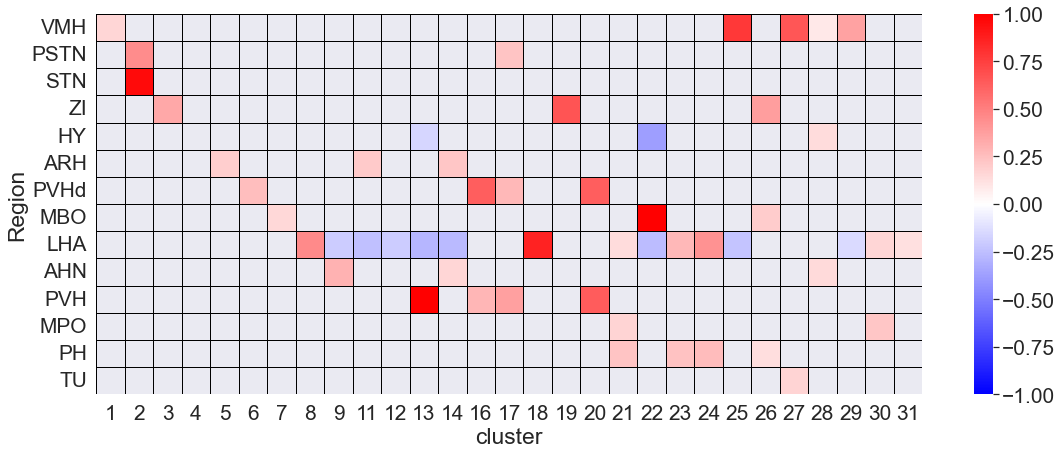

In [14]:
fig, ax = plt.subplots(figsize = (18.5,7))
sns.set(font_scale=1.9)
sns.heatmap(data = dfregion_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                  mask = dfregion_pvalue2>0.05
                 )
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
plt.savefig("heatmap_for_region1.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_region1.jpg",dpi =600,format="jpg")

In [15]:
# for geno distribution
dfgeno = pd.read_csv("markersGeno_perSubtype_7180.csv",index_col=0)

In [16]:
dfgeno.gene = dfgeno.gene.str.capitalize()
dfgeno_plot = dfgeno.pivot_table(columns="cluster",index="gene",values="avg_log2FC",aggfunc="mean").fillna(0)
dfgeno_pvalue = dfgeno.pivot_table(columns="cluster",index="gene",values="p_val_adj",aggfunc="mean").fillna(1)

In [17]:
indexnew = ['Agrp','Wt(orexin)','Oxt','Pomc','Adcyap1','Nts','Pdyn','Penk','Sst','Tac1','Tac2','Trh']

In [18]:
dfgeno_plot = dfgeno_plot.loc[indexnew,:]
dfgeno_pvalue = dfgeno_pvalue.loc[indexnew,:]

In [19]:
geno_list = []
for i in dfgeno_plot.columns.tolist():
    geno =dfgeno_plot.loc[dfgeno_plot[i]>0].index.tolist()
    geno_list.extend([item for item in geno if item not in geno_list])
geno_list.extend([item for item in dfgeno_plot.index.tolist() if item not in geno_list])
dfgeno_plot2 =dfgeno_plot.loc[geno_list,:]
dfgeno_pvalue2 =dfgeno_pvalue.loc[geno_list,:]

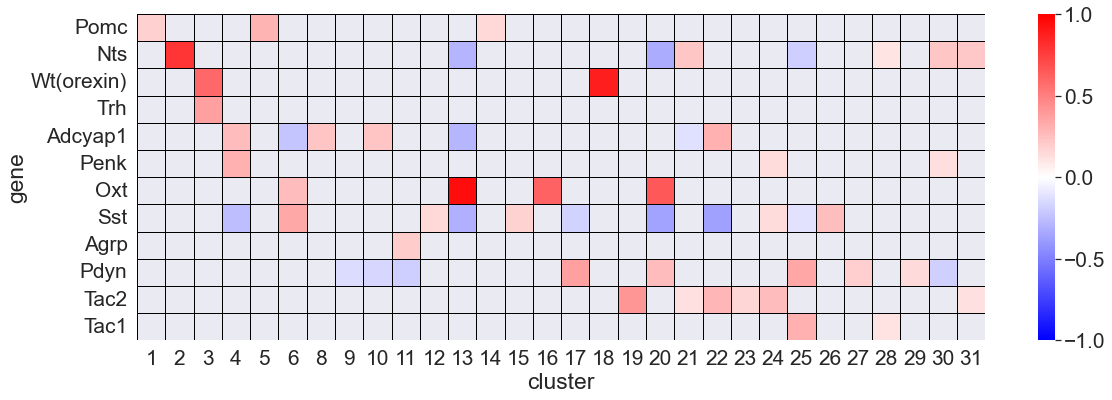

In [20]:
fig, ax = plt.subplots(figsize = (19,6))
sns.set(font_scale=1.9)
sns.heatmap(data = dfgeno_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                 mask = dfgeno_pvalue2>0.05
                 )

plt.savefig("heatmap_for_geno.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_geno.jpg",dpi =600,format="jpg")